In [44]:
# Import libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, auc, confusion_matrix, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data=pd.read_csv("bank-additional.csv", sep=";")

In [46]:
data.shape

(4119, 21)

In [47]:
data.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [48]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [50]:
col=data.select_dtypes(include=['object'])
col.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,no
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,no
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,no
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,no


In [51]:
columns=col.columns
print(columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [52]:
print('marital:\n', col['marital'].unique())

marital:
 ['married' 'single' 'divorced' 'unknown']


In [53]:
# knowing the categorical variables
print('Jobs:\n', col['job'].unique())

Jobs:
 ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']


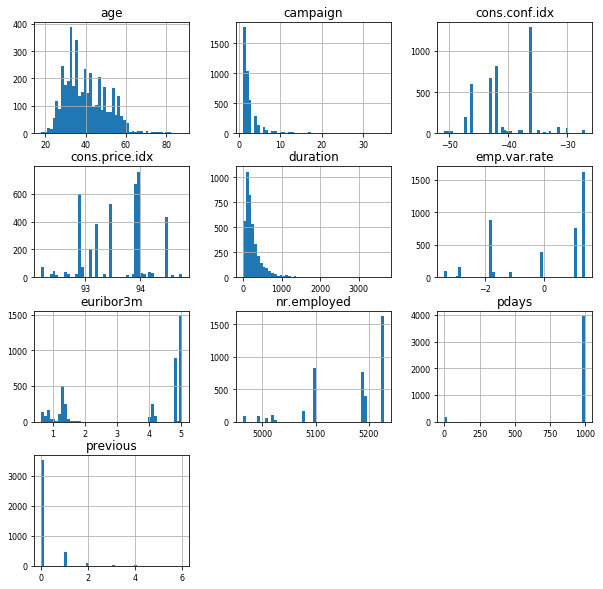

In [54]:
data.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [55]:
# Convert target variable into numeric
data.y = data.y.map({'no':0, 'yes':1})

In [56]:
# Replacing values with binary ()
data.contact = data.contact.map({'cellular': 1, 'telephone': 0})
data.loan = data.loan.map({'yes': 1, 'unknown': 0, 'no' : 0})
data.housing = data.housing.map({'yes': 1, 'unknown': 0, 'no' : 0})
data.default = data.default.map({'no': 1, 'unknown': 0, 'yes': 0})
data.pdays = data.pdays.replace(999, 0) # replace with 0 if not contact 

In [57]:
# binary if were was an outcome of marketing campane
data.poutcome = data.poutcome.map({'nonexistent':0, 'failure':0, 'success':1})

In [58]:
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'month', 'day_of_week'],drop_first=True)

In [59]:
data.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,30,1,1,0,1,487,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,39,1,0,0,0,346,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,25,1,1,0,0,227,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,38,1,0,0,0,17,3,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,47,1,1,0,1,58,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


#Convert Duration Call into 5 category'''
def duration(data):
    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration'] = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration'] = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 645), 'duration'] = 4
    data.loc[data['duration']  > 645, 'duration'] = 5
    return data
duration(data);

In [60]:
y = data.y

In [61]:
x = data.copy()
del x['y']
x.head(2)

,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,30,1,1,0,1,487,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,39,1,0,0,0,346,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [62]:
x.columns

Index(['age', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')

In [63]:
# Build correlation matrix
#corr = data.corr()
#corr.style.background_gradient(cmap='PuBu')

In [64]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [65]:
std_scaler.fit(x)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [66]:
scaled_x=std_scaler.transform(x)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [67]:
data_x = pd.DataFrame(scaled_x)

In [68]:
data_x.columns = ['age', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed']

In [69]:
data_x.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,-0.980752,0.492477,0.945406,-0.438783,0.743752,0.903952,-0.209228,-0.166358,-0.351356,-0.188958,...,-0.384283,-0.108585,1.410360,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050
1,-0.107991,0.492477,-1.057746,-0.438783,-1.344534,0.350300,0.569634,-0.166358,-0.351356,-0.188958,...,-0.384283,-0.108585,1.410360,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050
2,-1.465619,0.492477,0.945406,-0.438783,-1.344534,-0.116966,-0.598660,-0.166358,-0.351356,-0.188958,...,2.602249,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,2.044782
3,-0.204965,0.492477,-1.057746,-0.438783,-1.344534,-0.941553,0.180203,-0.166358,-0.351356,-0.188958,...,2.602249,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050
4,0.667795,0.492477,0.945406,-0.438783,0.743752,-0.780563,-0.598660,-0.166358,-0.351356,-0.188958,...,-0.384283,-0.108585,-0.709039,2.869743,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050


In [70]:
x_train,x_test,y_train,y_test = train_test_split(data_x,y,test_size=0.2,random_state=42)

In [71]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3295, 49), (824, 49), (3295,), (824,))

# model building

In [72]:
!pip install xgboost


You should consider upgrading via the 'pip install --upgrade pip' command.


In [73]:
#boosting
from xgboost.sklearn import XGBClassifier
model_xgb =  XGBClassifier(n_estimators=1000,learning_rate = 0.1)

In [74]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [75]:
model_xgb.score(x_train,y_train)

0.9942336874051594

In [76]:
#testing on test data

In [77]:
y_pred = model_xgb.predict(x_test)
#y_pred


In [78]:
accuracy_score(y_test,y_pred)

0.9053398058252428

In [79]:
#apply cv
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [3,5,7],'n_estimators': [250, 500, 750]}

In [80]:
model1_cv = GridSearchCV(model_xgb,parameters,cv=5,scoring='accuracy')

In [81]:
model1_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7], 'n_estimators': [250, 500, 750]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [82]:
model1_cv.best_params_

{'max_depth': 7, 'n_estimators': 250}

In [83]:
model_cv = XGBClassifier(n_estimators=250,max_features=5,random_state=100,max_depth=7)
model_cv.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=7, max_features=5, min_child_weight=1,
       missing=None, n_estimators=750, n_jobs=1, nthread=None,
       objective='binary:logistic', oob_score=True, random_state=100,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbose=1, verbosity=1)

In [85]:
y_pred_=model_cv.predict(x_test)

In [86]:
accuracy_score(y_test,y_pred_)

0.904126213592233